+-------+-----------+-----------+-----------+----------+
| Sr.No | States/UT | Confirmed | Recovered | Deceased |
+-------+-----------+-----------+-----------+----------+
|       |   Total   |     0     |     0     |    0     |
+-------+-----------+-----------+-----------+----------+


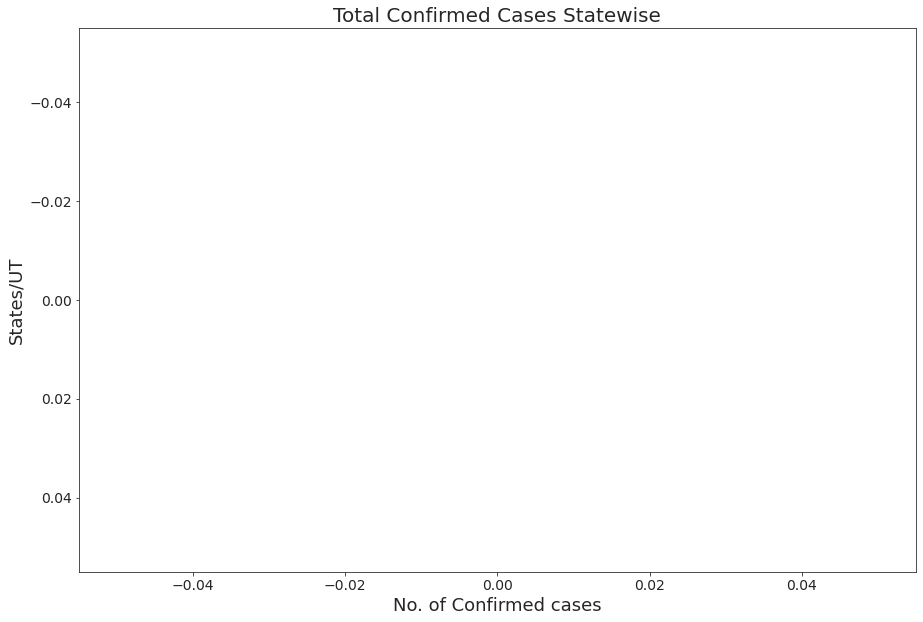

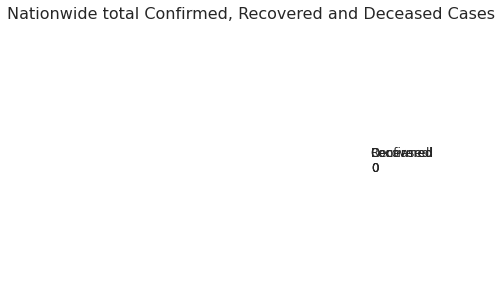

NameError: ignored

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
from bs4 import BeautifulSoup 
from prettytable import PrettyTable

# offical ministry of health website
url = 'https://www.mohfw.gov.in/' 

# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content

# parse the html content
soup = BeautifulSoup(web_content, "html.parser")

# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row] 

stats = [] # initialize stats
all_rows = soup.find_all('tr') # find all table rows 

for row in all_rows: 
    stat = extract_contents(row.find_all('td')) # find all data cells  
    # notice that the data that we require is now a list of length 5
    if len(stat) == 5: 
        stats.append(stat)

# now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)

# converting the 'string' data to 'int'
state_data['Confirmed'] = state_data['Confirmed'].map(int)
state_data['Recovered'] = state_data['Recovered'].map(int)
state_data['Deceased']  = state_data['Deceased'].map(int)

# pretty table representation
table = PrettyTable()
table.field_names = (new_cols)
for i in stats:
    table.add_row(i)
table.add_row(["","Total", 
               sum(state_data['Confirmed']), 
               sum(state_data['Recovered']), 
               sum(state_data['Deceased'])])
print(table)

# barplot to show total confirmed cases Statewise 
sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"], state_data["Confirmed"].map(int),
         align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis() # this is to maintain the order in which the states appear
plt.xticks(fontsize = 14) 
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 20)

for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12, verticalalignment = 'center')
plt.show()  

# donut chart representing nationwide total confirmed, cured and deceased cases
group_size = [sum(state_data['Confirmed']), 
              sum(state_data['Recovered']), 
              sum(state_data['Deceased'])]

group_labels = ['Confirmed\n' + str(sum(state_data['Confirmed'])), 
                'Recovered\n' + str(sum(state_data['Recovered'])), 
                'Deceased\n'  + str(sum(state_data['Deceased']))]
custom_colors = ['skyblue','yellowgreen','tomato']

plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12) 
plt.title('Nationwide total Confirmed, Recovered and Deceased Cases', fontsize = 16)
plt.show()

# read the state wise shapefile of India in a GeoDataFrame and preview it


# correct the name of states in the map dataframe 
map_data['States/UT'] = map_data['States/UT'].str.replace('&', 'and')
map_data['States/UT'].replace('Arunanchal Pradesh', 'Arunachal Pradesh', inplace = True)
map_data['States/UT'].replace('Telangana', 'Karnataka', inplace = True)
map_data['States/UT'].replace('NCT of Delhi', 'Delhi', inplace = True)

# merge both the dataframes - state_data and map_data
merged_data = pd.merge(map_data, state_data, how = 'left', on = 'States/UT')
merged_data.fillna(0, inplace = True)
merged_data.drop('Sr.No', axis = 1, inplace = True)
merged_data.head()

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Covid-19 Statewise Data - Confirmed Cases', fontdict = {'fontsize': '25', 'fontweight' : '3'})
# plot the figure
merged_data.plot(column = 'Confirmed', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)
plt.show() 

In [ ]:
try: 
	from googlesearch import search 
except ImportError: 
	print("No module named 'google' found") 

# to search 
query = "Geeksforgeeks"

for j in search(query, tld="co.in", num=10, stop=10, pause=2): 
	print(j) 
 
try: 
	from googlesearch import search 
except ImportError: 
	print("No module named 'google' found") 

# to search 
query = "A computer science portal"

for j in search(query, tld="co.in", num=10, stop=10, pause=2): 
	print(j) 



https://www.geeksforgeeks.org/
https://twitter.com/geeksforgeeks?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor
https://twitter.com/geeksforgeeks/status/1303381469914570752?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://twitter.com/geeksforgeeks/status/1303300157551734785?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://twitter.com/geeksforgeeks/status/1303273010120409089?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Etweet
https://www.youtube.com/channel/UC0RhatS1pyxInC00YKjjBqQ
https://www.youtube.com/watch?v=07QCAJYolaE
https://www.linkedin.com/company/geeksforgeeks
https://www.instagram.com/geeks_for_geeks/?hl=en
https://www.facebook.com/geeksforgeeks.org/
https://www.geeksforgeeks.org/page/4/
https://www.geeksforgeeks.org/
https://www.geeksforgeeks.org/java/
https://www.geeksforgeeks.org/data-structures/
https://www.geeksforgeeks.org/fundamentals-of-algorithms/
https://www.geeksforgeeks.org/computer-network-tutorials/
https://en.wikipedia.org/w